In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df1 = pd.read_csv(r'C:\Users\admin\Downloads\Boston.csv')
df1.head()
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's 

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df = df1.drop('Unnamed: 0', axis = 1)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['rad'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: rad, dtype: int64

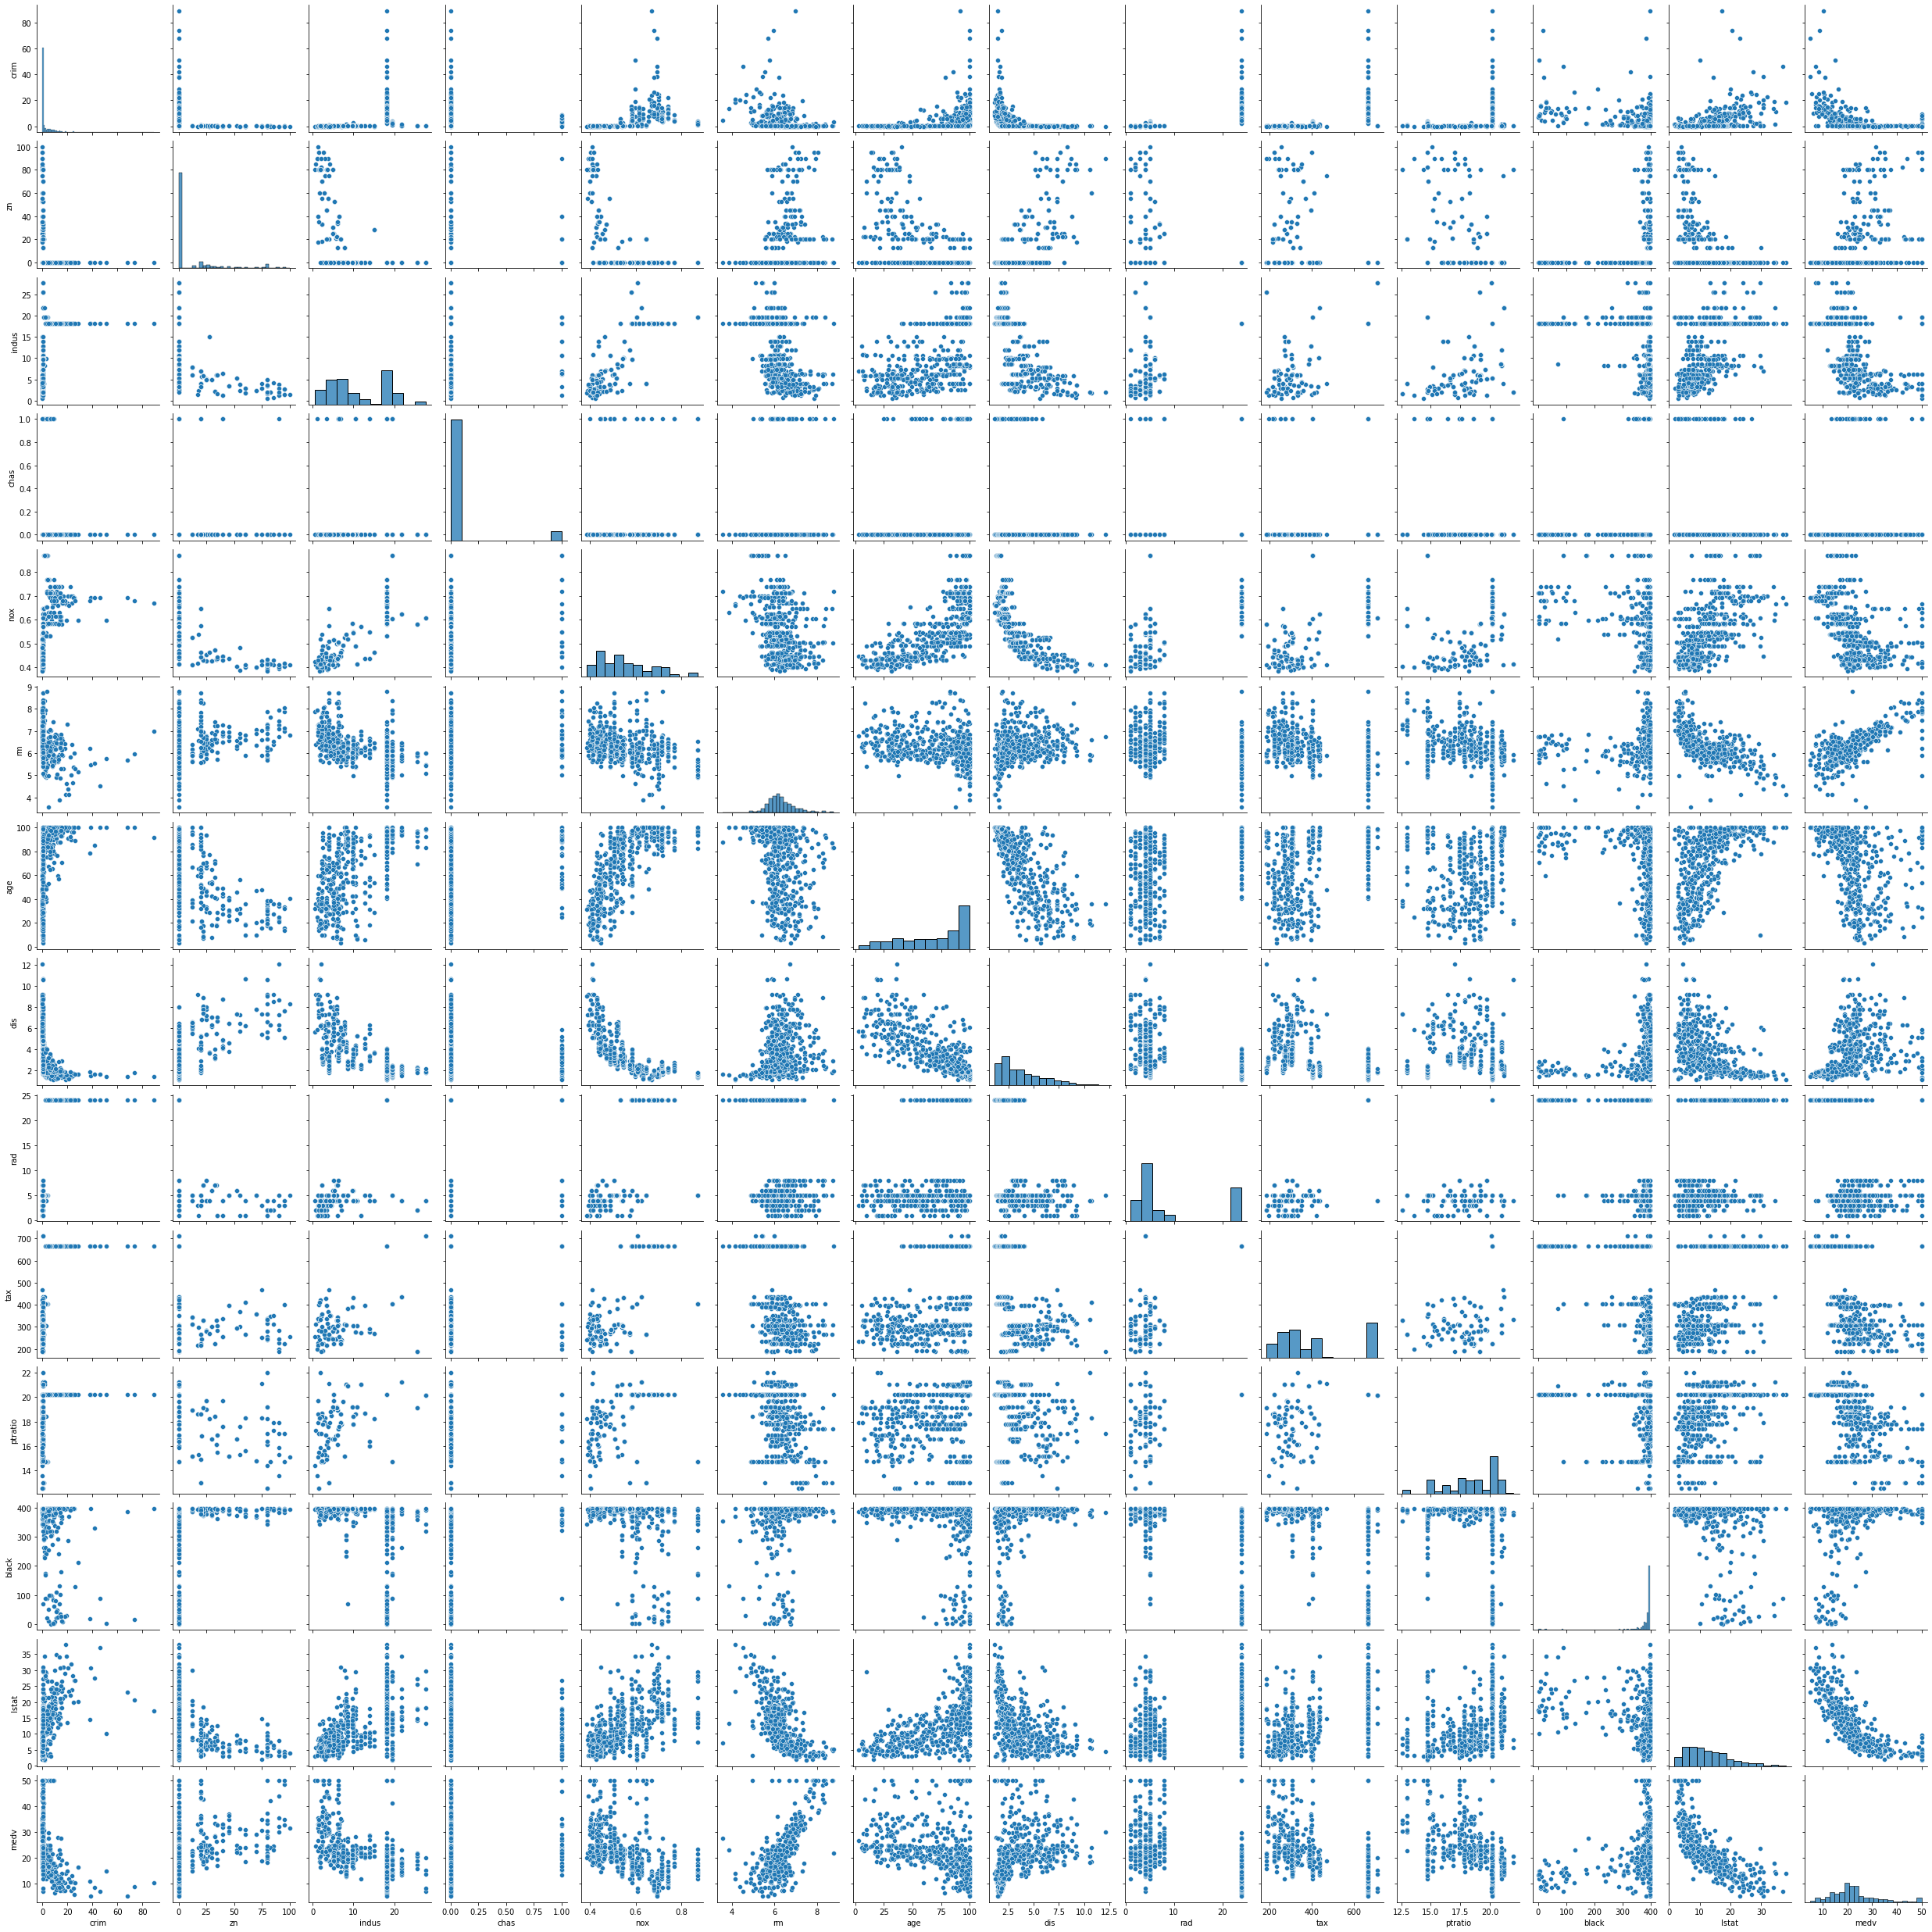

In [10]:
sns.pairplot(df)

<AxesSubplot:>

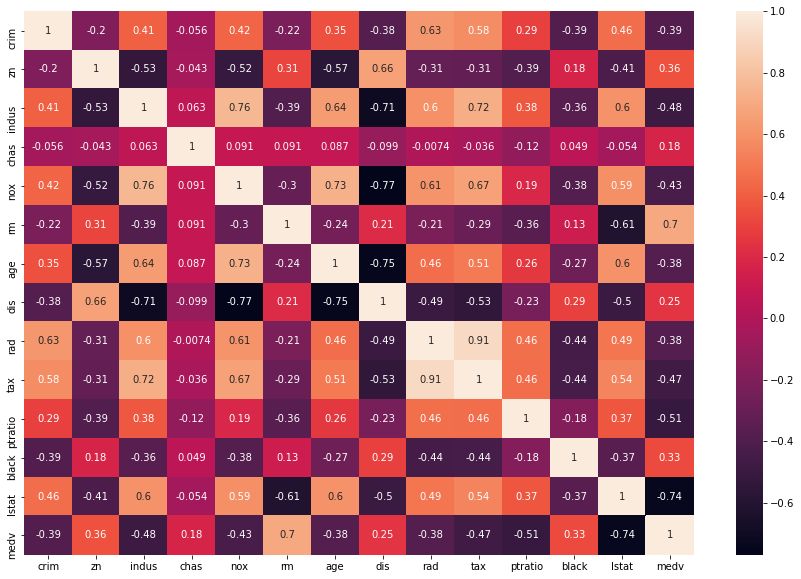

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
#Good coorelation betn 'medv'(median value) and 'rm'

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


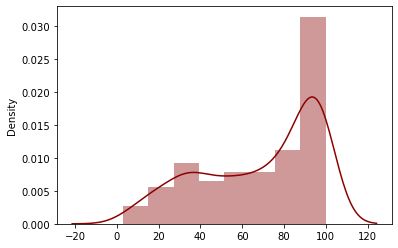

In [12]:
sns.distplot(x=df['age'], color='darkred') # if kde = False then the line in graph dissapears
plt.show()

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <BarContainer object of 10 artists>)

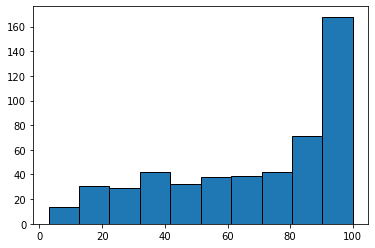

In [13]:
plt.hist(df['age'], edgecolor = 'black')

<AxesSubplot:xlabel='chas', ylabel='count'>

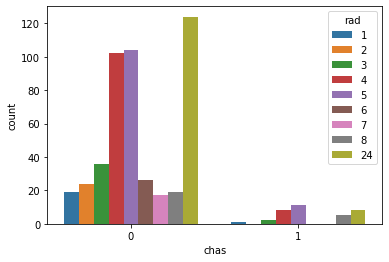

In [14]:
sns.countplot(data = df, x = 'chas', hue = 'rad')

<AxesSubplot:xlabel='chas', ylabel='count'>

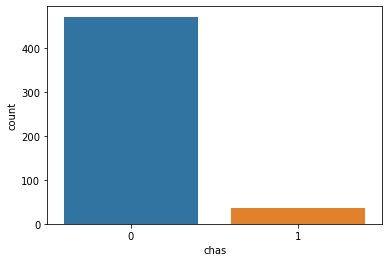

In [15]:
sns.countplot(x=df['chas'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

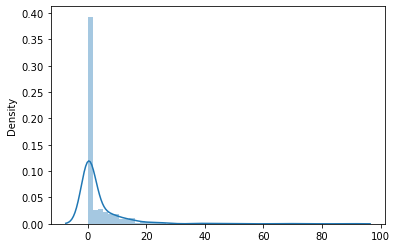

In [16]:
sns.distplot(x = df['crim'])

<AxesSubplot:xlabel='crim', ylabel='Count'>

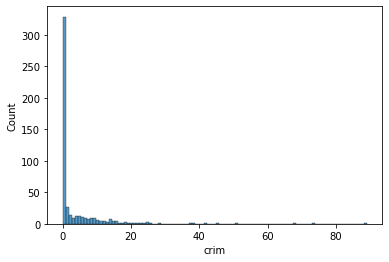

In [17]:
sns.histplot(df['crim'])

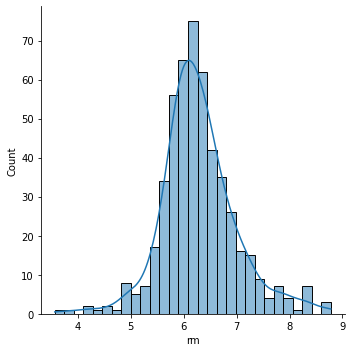

In [18]:
sns.displot(x = df['rm'], kde = True)

In [19]:
x = df.iloc[:,0:13]
y = df.iloc[:,-1]
print(x.shape, y.shape)

(506, 13) (506,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state = 0)
X_train.shape

(404, 13)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
#Print the coefficients for each column of our model and intercept
print(model.coef_)  # y = mx +c (Here m is the coefficient and c is the y intercept)
print(model.intercept_)

[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]
38.09169492630278


In [23]:
#Finding Training Accuracy of complete data
print('Training Accuracy', model.score(X_train,y_train))

Training Accuracy 0.7730135569264234


In [24]:
#Finding Testing Accuracy of complete data
print('Testing Accuracy', model.score(X_test,y_test))

Testing Accuracy 0.589222384918251


In [25]:
#Finding Model Accuracy of complete data
from sklearn.metrics import r2_score
print('Model Accuracy',r2_score(y, model.predict(x)))

Model Accuracy 0.7373440319905034


In [26]:
#print the prediction on our test data set
y_pred = model.predict(X_test)
y_pred

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

In [27]:
y_test.head(10)

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
15     19.9
487    20.6
340    18.7
310    16.1
102    18.6
Name: medv, dtype: float64

In [28]:
#Checking model performance / accuracy  using "np mean squared error" (MSE)
print(np.mean((y_pred-y_test)**2))

33.44897999767653


In [29]:
#Checking model performance / accuracy  using "sklean mean squared error" (MSE)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

33.448979997676524


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('predicted model accuracy',r2)

predicted model accuracy 0.589222384918251


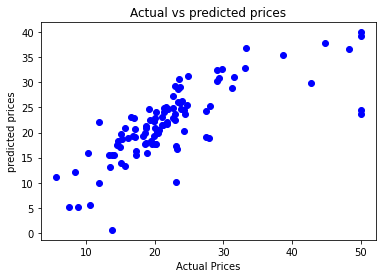

In [31]:
plt.scatter(y_test, y_pred, color = 'b')
plt.xlabel('Actual Prices')
plt.ylabel('predicted prices')
plt.title('Actual vs predicted prices')
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

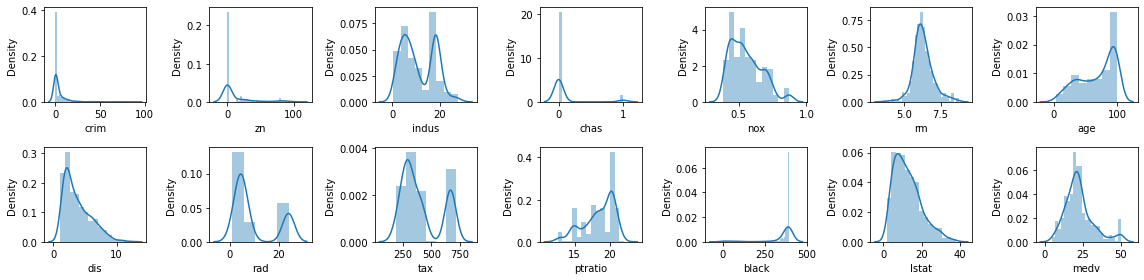

In [32]:
# Graphs To get skewness of columns(features) and selecting as per normal distribution , to get predictions with more accuracy 
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4)) #to get the blank graphs of 2x7

col = df.columns
index=0

for i in range (rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index += 1

plt.tight_layout() #To eliminate the overlapping of axises

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

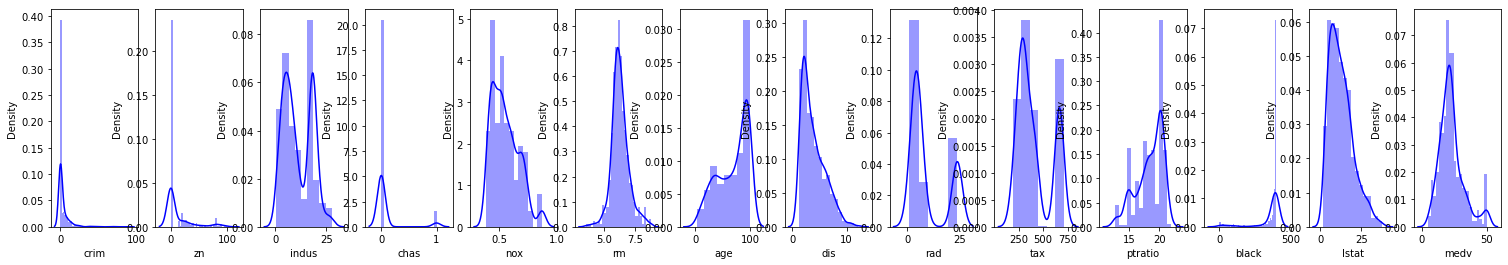

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 14, figsize = (26,4))
for i in range (len(df.columns)):
    sns.distplot(df[df.columns[i]], ax = ax[i], color = 'b')
    
plt.tight_layout

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

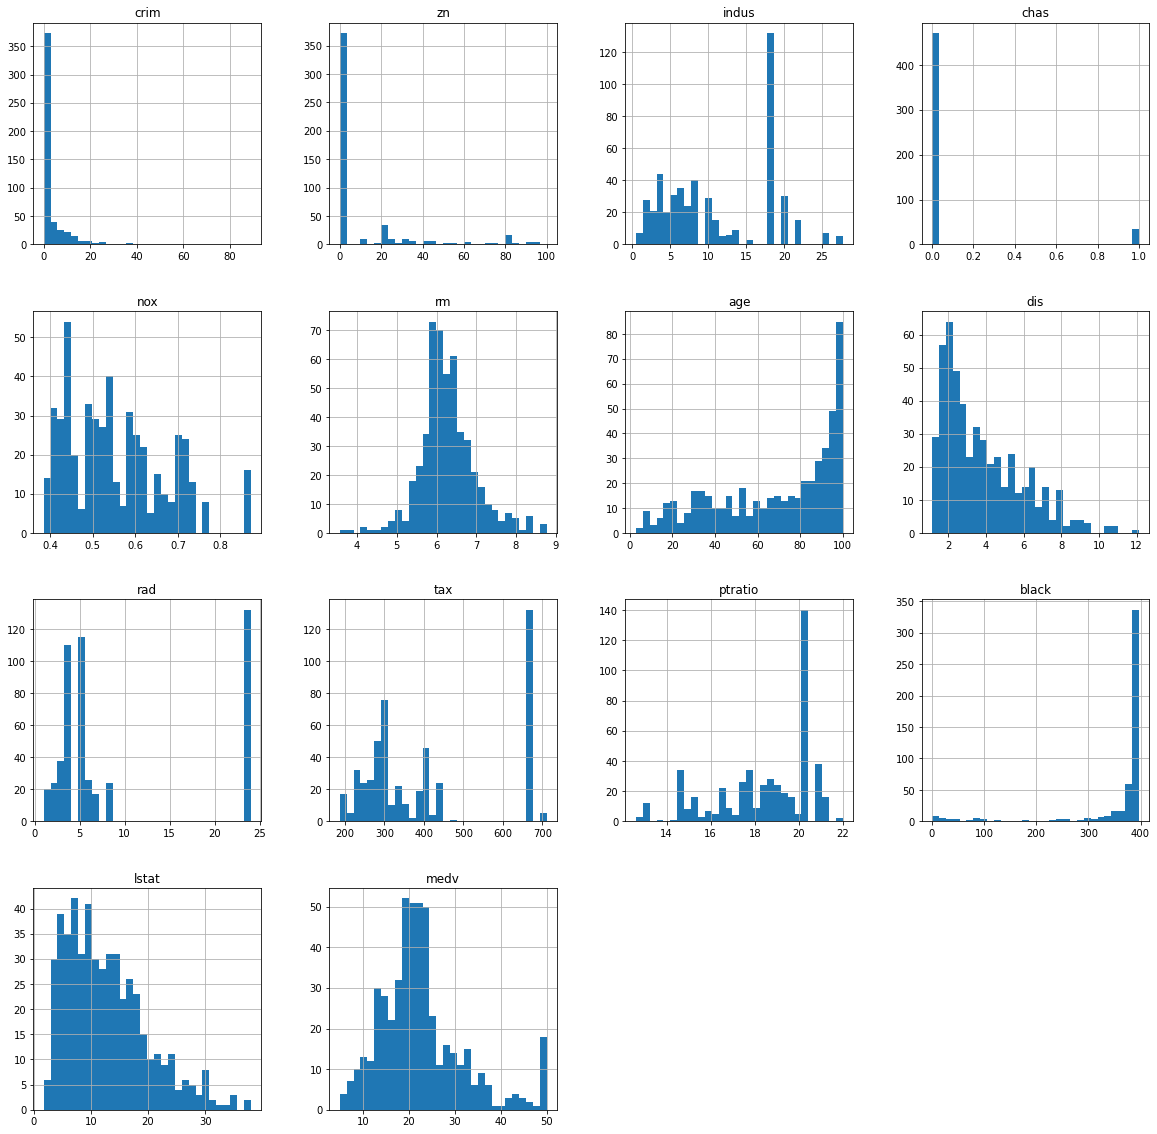

In [34]:
df.hist(bins=30,figsize=(20,20))

In [35]:
cormat = df.corr()
cormat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [36]:
abs(cormat['medv'][3]) > 0.5

False

In [37]:
#Find Correlation Data with simple loop
features = []
values = []

for i in range(len(cormat.index)):
    if abs(cormat['medv'][i])> 0.5:
        features.append(cormat.index[i])
        values.append(cormat['medv'][i])
        
cordata = pd.DataFrame(data = values, index = features, columns = ['Corr_Values'])
cordata

,Corr_Values
rm,0.695360
ptratio,-0.507787
lstat,-0.737663
medv,1.000000


In [38]:
cormat['medv'].index[4]

'nox'

In [39]:
abs(cormat['medv'])>0.5

crim       False
zn         False
indus      False
chas       False
nox        False
rm          True
age        False
dis        False
rad        False
tax        False
ptratio     True
black      False
lstat       True
medv        True
Name: medv, dtype: bool

In [40]:
cormat['medv'].index

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [41]:
cormat['medv']['crim']

-0.38830460858681154

In [42]:
# Correlation data using ("def" and "return")
def getCorrelatedFeature(corrdata, threshold):
    features = []
    values = []
    
    for index in (corrdata.index):
        if abs(corrdata[index])> threshold:
            features.append(index)
            values.append(corrdata[index])
        
    cordata1 = pd.DataFrame(data = values, index = features, columns = ['Corr_Values'])
    return cordata1


In [43]:
a = ['a','b','c','d','e']

for i, index in enumerate(a):
    print(i,index)

0 a
1 b
2 c
3 d
4 e


In [44]:
getCorrelatedFeature(cormat['medv'], 0.5)

,Corr_Values
rm,0.695360
ptratio,-0.507787
lstat,-0.737663
medv,1.000000


In [45]:
correlated_data = df[cordata.index]
correlated_data.head()

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


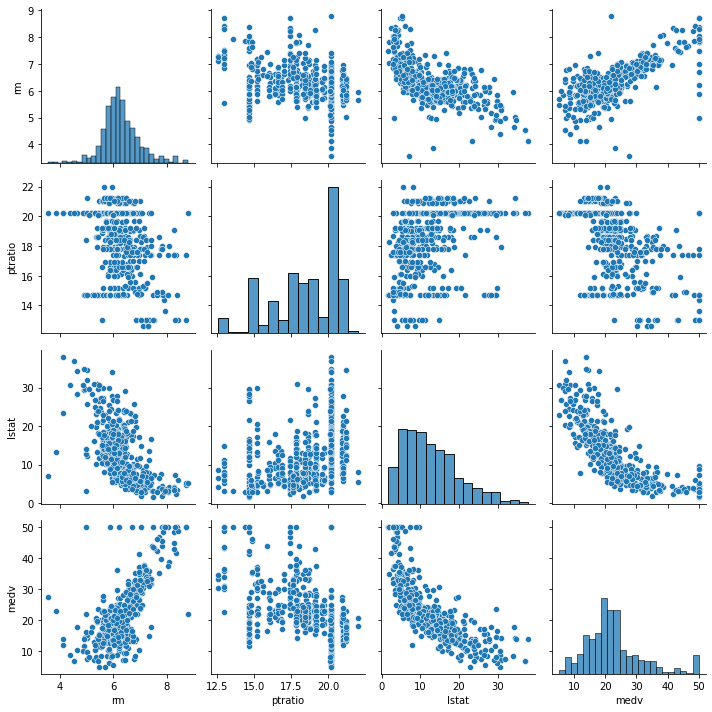

In [46]:
#Lets get pairplot of selected values
sns.pairplot(correlated_data)
plt.tight_layout()

<AxesSubplot:>

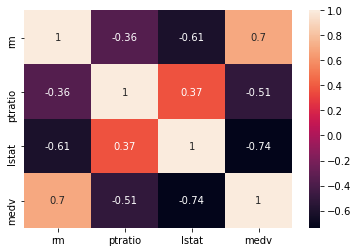

In [47]:
sns.heatmap(correlated_data.corr(), annot = True)

In [48]:
x = correlated_data.drop('medv', axis = 1)
y = correlated_data['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [49]:
x = correlated_data.iloc[:,0:2]
x

,rm,ptratio
0,6.575,15.3
1,6.421,17.8
2,7.185,17.8
3,6.998,18.7
4,7.147,18.7
...,...,...
501,6.593,21.0
502,6.120,21.0
503,6.976,21.0
504,6.794,21.0


In [50]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [52]:
X_train.shape, X_test.shape

((404, 2), (102, 2))

In [53]:
Y_train.shape, Y_test.shape

((404,), (102,))

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_predict = model.predict(X_test)
y_predict

array([25.12527506, 19.42663194, 26.15868455, 12.80995015, 21.73316388,
       15.34629692, 17.053174  , 17.53397094, 12.56174159, 19.84962456,
       17.45002227, 22.79221057, 20.38059414,  7.49065694, 39.5400618 ,
       33.58671162, 19.62505608, 38.66793223, 27.1877116 , 18.08971381,
       21.90305834, 24.87193906, 17.72801263, 25.24299977, 18.70075676,
        1.46924755, 16.34604931, 23.56691877, 36.77199055, 21.97538108,
       19.19004932, 18.39635277, 21.10486042, 23.74581599, 26.19559091,
       16.27474084, 17.6789732 , 16.82422307, 20.43401602, 19.01452027,
       24.86380022, 19.4944533 , 23.68288422, 13.40522256, 28.16131964,
       24.48620958, 22.29191814, 26.77223175, 17.41577053, 22.30703118,
       26.9477608 , 16.71600825, 21.71077592, 36.62010159, 14.46739957,
       24.21248275, 20.34020068, 19.03854857, 15.92368276, 19.80297046,
       19.65984639, 21.26187682, 31.24327333, 26.06847524, 15.58788806,
       29.30282503, 22.77694718, 27.93675116, 24.2803916 , 19.27

In [56]:
comp_data = pd.DataFrame(data = [y_predict,y_test])
comp_data

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,25.125275,19.426632,26.158685,12.80995,21.733164,15.346297,17.053174,17.533971,12.561742,19.849625,...,24.136285,32.289323,16.84211,20.20432,3.567964,24.924347,21.784826,16.529717,22.970125,20.376212
1,22.600000,50.000000,23.000000,8.30000,21.200000,19.900000,20.600000,18.700000,16.100000,18.600000,...,21.900000,24.800000,11.90000,24.30000,13.800000,24.700000,14.100000,18.700000,28.100000,19.800000


In [57]:
comp_data.T

,0,1
0,25.125275,22.6
1,19.426632,50.0
2,26.158685,23.0
3,12.809950,8.3
4,21.733164,21.2
...,...,...
97,24.924347,24.7
98,21.784826,14.1
99,16.529717,18.7
100,22.970125,28.1


In [58]:
#Finding Accuracy of model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_pred)
MSE = mean_squared_error( y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
score, MSE, MAE

(0.589222384918251, 33.448979997676524, 3.8429092204445046)

In [71]:
total_features = []
total_feature_name = []
Selected_correlation_value = []
r2_scores = []
mae_values = []
mse_values = []

In [72]:
def performance_metrics(features, th, y_true, y_predict):
    score = r2_score(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    
    total_features.append(len(features)-1)
    total_feature_name.append(str(features))
    Selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_values.append(mae)
    mse_values.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [total_feature_name, total_features, Selected_correlation_value, r2_scores, mae_values, mse_values],
                                     index = ['features_name', 'Total_features', 'correlation_criteria', 'r2_score', 'mae', 'mse'])
    
    return metrics_dataframe.T

In [73]:
performance_metrics(correlated_data.columns.values, 0.5, y_test, y_pred)

,features_name,Total_features,correlation_criteria,r2_score,mae,mse
0,['rm' 'ptratio' 'lstat' 'medv'],3,0.5,0.589222,3.842909,33.44898


In [74]:
correlated_data[correlated_data.columns[1]]

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: ptratio, Length: 506, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anacond

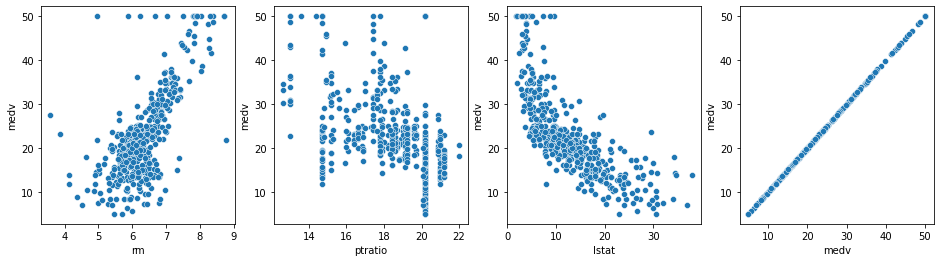

In [75]:
fig, ax = plt.subplots(1,len(correlated_data.columns),figsize = (16,4))
for i in range(len(correlated_data.columns)):
    sns.scatterplot(correlated_data[correlated_data.columns[i]], correlated_data['medv'], ax = ax[i])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anacond

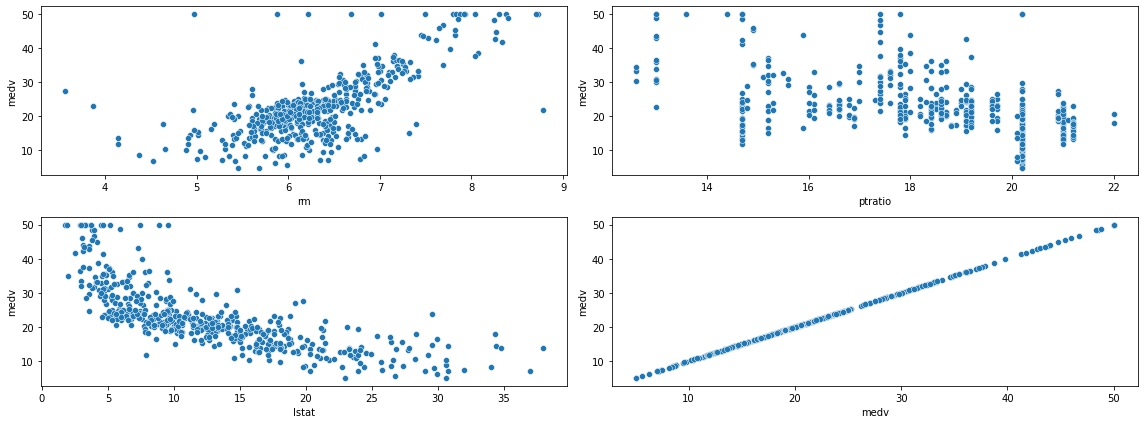

In [76]:
rows = 2
cols = 2
index = 0

fig, ax = plt.subplots(rows,cols,figsize=(16,6))

for i in range(rows):
    for j in range(cols):
        sns.scatterplot(correlated_data[correlated_data.columns[index]], correlated_data['medv'], ax = ax[i][j])
        index += 1
plt.tight_layout()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anacond

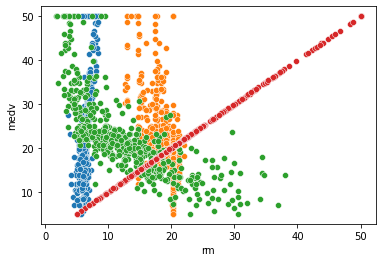

In [78]:
for i in range(len(correlated_data.columns)):
    sns.scatterplot(correlated_data[correlated_data.columns[i]], correlated_data['medv'])

<AxesSubplot:xlabel='medv', ylabel='value'>

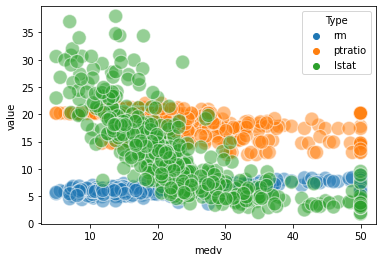

In [79]:
#melt is used to pivot the table w.r.t rows (by taking a column into row)
table = correlated_data.melt('medv', var_name = 'Type')
table
sns.scatterplot(data = table,
                x = 'medv',
                y = 'value',
                hue = 'Type',
                s = 200,
                alpha = 0.5)


In [80]:
table # melted data "df.melt()""

,medv,Type,value
0,24.0,rm,6.575
1,21.6,rm,6.421
2,34.7,rm,7.185
3,33.4,rm,6.998
4,36.2,rm,7.147
...,...,...,...
1513,22.4,lstat,9.670
1514,20.6,lstat,9.080
1515,23.9,lstat,5.640
1516,22.0,lstat,6.480


In [81]:
correlated_data

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


In [82]:
correlated_data.columns[2]

'lstat'

In [83]:
cormat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Increasing Threshold(0.6) to increase accuracy

In [84]:
# Using already written block of code(getCorrelatedFeature) to get particular columns
cor_value = getCorrelatedFeature(cormat['medv'],0.6)
cor_value

,Corr_Values
rm,0.695360
lstat,-0.737663
medv,1.000000


In [85]:
corr_data = df[cor_value.index]
corr_data

,rm,lstat,medv
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


In [86]:
def get_y_pred(corre_data):
    X = corre_data.drop('medv', axis = 1)
    y  = corre_data['medv']
    
    X_train,X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [87]:
y_pred = get_y_pred(corr_data)
y_pred

array([26.28587773, 24.25377886, 24.42060228, 13.11754087, 22.49511785,
       22.99636043, 21.40735689, 23.1439176 , 15.86631602, 24.49894913,
       15.66714802, 18.85052667, 19.48253539,  3.98290593, 37.34092175,
       31.60596506, 23.5941266 , 33.2950621 , 28.69055638, 22.88162089,
       26.85271393, 20.89975988, 20.81250528, 27.14537125, 21.08017113,
        9.74333537, 20.15512287, 17.56350171, 37.2052103 , 18.6688415 ,
       18.528333  , 20.17796936, 23.8988013 , 21.75587854, 25.59651746,
       18.79694526, 11.792485  , 22.93730323, 19.61654119, 14.43528526,
       24.42127312, 19.031016  , 24.1741034 , 14.58361474, 26.48547198,
       25.55656793, 17.94458882, 20.14812616,  4.60378383, 26.93655721,
       20.33112961, 16.17879073, 21.66465634, 38.61474899, 16.81321483,
       18.53552994, 19.74880245, 20.57255588, 21.52884614, 17.87655368,
       23.69717903, 21.63170868, 31.22593617, 29.7494804 , 18.25853524,
       29.24595764, 21.12607982, 17.92429807, 20.78992128, 21.71

In [88]:
performance_metrics(corr_data.columns.values, 0.6, y_test, y_pred)

,features_name,Total_features,correlation_criteria,r2_score,mae,mse
0,['rm' 'ptratio' 'lstat' 'medv'],3,0.5,0.589222,3.842909,33.44898
1,['rm' 'lstat' 'medv'],2,0.6,0.540908,4.142445,37.383106


# # Increasing Threshold(0.7) to increase accuracy

In [89]:
# Using already written block of code(getCorrelatedFeature) to get particular columns
core_value = getCorrelatedFeature(cormat['medv'],0.7)
core_value

,Corr_Values
lstat,-0.737663
medv,1.000000


In [90]:
core_data = df[core_value.index]
core_data

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [91]:
y_pred = get_y_pred(core_data)
y_pred

array([27.74457365, 25.64986578, 24.72207279, 15.85543263, 22.96213559,
       26.66374265, 23.81340956, 25.87942281, 22.6751893 , 24.5977294 ,
       15.04241816, 14.46852559, 17.7492781 ,  7.71572305, 32.92873651,
       30.23144144, 24.49251577, 30.86272327, 29.66711375, 26.37679636,
       27.87848191, 23.25864675, 21.28828227, 27.88804679, 24.9994542 ,
       22.01521285, 21.53696905, 19.66225332, 30.73837988, 18.41881943,
       17.51972107, 20.70482482, 25.05684346, 22.90474633, 26.11854471,
       20.76221408,  9.16001934, 26.27158273, 17.89275124, 11.71384127,
       26.55852901, 21.23089301, 26.07072033, 17.41450744, 26.49157488,
       26.02289595, 19.61442894, 20.30310003,  6.74967056, 25.75507942,
       20.39874879, 17.93101075, 23.62211204, 31.37922658, 18.20839215,
       19.73877233, 22.8760517 , 22.64649468, 25.09510296, 18.24665166,
       27.31415422, 22.58910542, 30.11666293, 31.1687993 , 20.64743557,
       30.40360921, 17.80666736, 15.20502105, 15.84586775, 24.36

In [92]:
performance_metrics(core_data.columns.values, 0.7, y_test, y_pred)

,features_name,Total_features,correlation_criteria,r2_score,mae,mse
0,['rm' 'ptratio' 'lstat' 'medv'],3,0.5,0.589222,3.842909,33.44898
1,['rm' 'lstat' 'medv'],2,0.6,0.540908,4.142445,37.383106
2,['lstat' 'medv'],1,0.7,0.430957,4.864011,46.336305


In [93]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim= None, cv=None,
                       n_jobs= None, train_sizes=np.linspace(.1,1.0,10)):
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    
    train_sizes, train_score, test_score = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    
    train_score_mean = np.mean(train_score, axis = 1)
    train_score_std = np.std(train_score, axis = 1)
    test_score_mean = np.mean(test_score, axis = 1)
    test_score_std = np.std(test_score, axis = 1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_score_mean - train_score_std,
                    train_score_mean + train_score_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_score_mean - test_score_std,
                    test_score_mean + test_score_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_score_mean, 'o-', color = 'r', label = 'Training score')
    plt.plot(train_sizes, test_score_mean, 'o-', color = 'g', label = 'Cross Validation score')
    
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

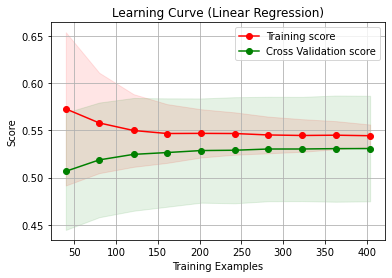

In [94]:
from sklearn.model_selection import ShuffleSplit
X = core_data.drop('medv', axis = 1)
y = core_data['medv']
title = 'Learning Curve (Linear Regression)'
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title,X,y, ylim = (0.7,1.01), cv = cv, n_jobs = 4)